In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from datetime import datetime
from datetime import timedelta 
import math
import matplotlib
from pylab import rcParams
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pygeohash as pgh

In [26]:
yellow = pd.read_csv("Dataset/yellow_trips.csv")


In [13]:
#uber = pd.concat([pd.read_csv("Dataset/uber_trips_2014.csv"), pd.read_csv("Dataset/uber_trips_2015.csv")], ignore_index=True) 


uber1 =  pd.read_csv("Dataset/uber_trips_2014.csv")





In [16]:
uber1["date"] = pd.to_datetime(uber1['pickup_datetime'])

In [18]:
uber2 =  pd.read_csv("Dataset/uber_trips_2015.csv")

In [20]:
uber2["date"] = pd.to_datetime(uber2["pickup_datetime"], format='%Y-%m-%d %H:%M:%S')

In [22]:
uber = pd.concat([uber1,uber2], ignore_index=True) 
del uber1
del uber2

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [23]:
uber.head()

,affiliate_base,base,date,dispatch_base,pickup_datetime,pickup_latitude,pickup_location_id,pickup_longitude
0,NaN,B02512,2014-04-01 00:11:00,NaN,4/1/14 0:11,40.7690,NaN,-73.9549
1,NaN,B02512,2014-04-01 00:17:00,NaN,4/1/14 0:17,40.7267,NaN,-74.0345
2,NaN,B02512,2014-04-01 00:21:00,NaN,4/1/14 0:21,40.7316,NaN,-73.9873
3,NaN,B02512,2014-04-01 00:28:00,NaN,4/1/14 0:28,40.7588,NaN,-73.9776
4,NaN,B02512,2014-04-01 00:33:00,NaN,4/1/14 0:33,40.7594,NaN,-73.9722


In [27]:
mta = pd.read_csv("Dataset/mta_trips.csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [34]:
yellow["pickup_datetime"] = pd.to_datetime(yellow["pickup_datetime"], format='%Y-%m-%d %H:%M:%S')
yellow["dropoff_datetime"] = pd.to_datetime(yellow["dropoff_datetime"], format='%Y-%m-%d %H:%M:%S')
uber["pickup_datetime"] = uber["date"]

In [38]:
mta["pickup_datetime"] = pd.to_datetime(mta['datetime'])

In [45]:
print("=================== Yellow ====================")
print(yellow["pickup_datetime"].max())
print(yellow["pickup_datetime"].min())
print("=================== mta ====================")
print(mta["pickup_datetime"].max())
print(mta["pickup_datetime"].min())
print("=================== Uber ====================")
print(uber["pickup_datetime"].max())
print(uber["pickup_datetime"].min())

=================== Yellow ====================
2015-06-30 23:59:59
2014-04-01 00:00:00
=================== mta ====================
2015-06-26 23:57:44
2014-03-29 00:29:55
=================== Uber ====================
2015-06-30 23:59:00
2014-04-01 00:00:00


## Date conclusion

- Uber only has pickup date for dates in 2014 
- yello starts since 2014-04 so in order to compare we need both values 


In [57]:
mta.head()

,station,line_name,division,audit_type,unit_id,datetime,new_entries,new_exits,latitude,longitude,pickup_datetime
0,WHITEHALL ST,R1,BMT,REGULAR,R001_A058_01-00-00,03/29/2014 05:00:00,4,6,40.703087,-74.012994,2014-03-29 05:00:00
1,WHITEHALL ST,R1,BMT,REGULAR,R001_A058_01-00-00,03/29/2014 09:00:00,1,13,40.703087,-74.012994,2014-03-29 09:00:00
2,WHITEHALL ST,R1,BMT,REGULAR,R001_A058_01-00-00,03/29/2014 13:00:00,1,8,40.703087,-74.012994,2014-03-29 13:00:00
3,WHITEHALL ST,R1,BMT,REGULAR,R001_A058_01-00-00,03/29/2014 17:00:00,1,8,40.703087,-74.012994,2014-03-29 17:00:00
4,WHITEHALL ST,R1,BMT,REGULAR,R001_A058_01-00-00,03/29/2014 21:00:00,2,3,40.703087,-74.012994,2014-03-29 21:00:00


# Time series analisis 

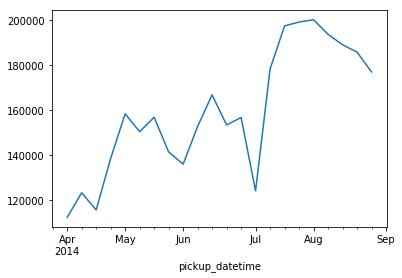

In [67]:
uber_time = uber[uber["pickup_datetime"] > '2014-04-01']
uber_time = uber_time[uber_time["pickup_datetime"] < '2014-09-01']
uber_time = uber_time[["pickup_datetime","base"]]
uber_time = uber_time.set_index("pickup_datetime")
uber_time = uber_time['base'].resample('W').count()
uber_time.plot()

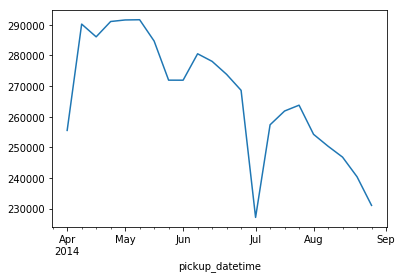

In [68]:
yellow_t = yellow[yellow["pickup_datetime"] > '2014-04-01']
yellow_t = yellow_t[yellow_t["pickup_datetime"] < '2014-09-01']
yellow_t = yellow_t[["pickup_datetime","passenger_count"]]
yellow_t = yellow_t.set_index("pickup_datetime")
yellow_t = yellow_t['passenger_count'].resample('W').sum()
yellow_t.plot()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


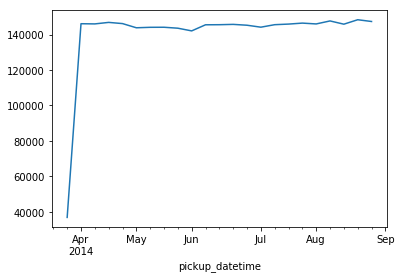

In [69]:
mta_time = mta[uber["pickup_datetime"] > '2014-04-01']
mta_time = mta_time[mta_time["pickup_datetime"] < '2014-09-01']
mta_time = mta_time[["pickup_datetime","new_entries"]]
mta_time = mta_time.set_index("pickup_datetime")
mta_time = mta_time['new_entries'].resample('W').count()
mta_time.plot()

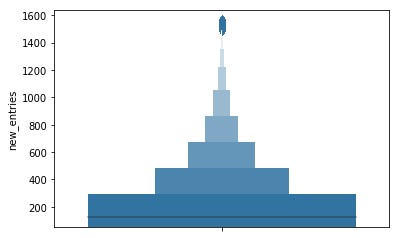

In [71]:
sns.boxenplot(data = mta, y= "new_entries")

In [73]:
mta.head()

,station,line_name,division,audit_type,unit_id,datetime,new_entries,new_exits,latitude,longitude,pickup_datetime
0,WHITEHALL ST,R1,BMT,REGULAR,R001_A058_01-00-00,03/29/2014 05:00:00,4,6,40.703087,-74.012994,2014-03-29 05:00:00
1,WHITEHALL ST,R1,BMT,REGULAR,R001_A058_01-00-00,03/29/2014 09:00:00,1,13,40.703087,-74.012994,2014-03-29 09:00:00
2,WHITEHALL ST,R1,BMT,REGULAR,R001_A058_01-00-00,03/29/2014 13:00:00,1,8,40.703087,-74.012994,2014-03-29 13:00:00
3,WHITEHALL ST,R1,BMT,REGULAR,R001_A058_01-00-00,03/29/2014 17:00:00,1,8,40.703087,-74.012994,2014-03-29 17:00:00
4,WHITEHALL ST,R1,BMT,REGULAR,R001_A058_01-00-00,03/29/2014 21:00:00,2,3,40.703087,-74.012994,2014-03-29 21:00:00


In [54]:
yellow.head()

,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,total_amount
0,2014-04-03 18:28:10,2014-04-03 18:54:32,-74.006033,40.706284,-73.918837,40.744946,1,8.70,34.8
1,2014-04-16 15:42:00,2014-04-16 16:07:00,-73.979558,40.749357,0.000000,0.000000,1,9.37,30.0
2,2014-04-13 18:04:00,2014-04-13 18:07:00,-73.956453,40.775307,-73.954792,40.784992,1,0.89,6.5
3,2014-05-21 19:33:00,2014-05-21 19:45:00,-73.987212,40.757850,-73.960198,40.775472,1,2.40,12.5
4,2014-05-30 16:28:00,2014-05-30 16:51:00,-73.974292,40.755397,-74.011867,40.704222,3,5.58,24.5


In [75]:
yellow["pickup_geohash"] = yellow.apply(lambda row : pgh.encode(row["pickup_latitude"], row["pickup_longitude"], precision=5), axis = 1)

In [76]:
mta["pickup_geohash"] = mta.apply(lambda row : pgh.encode(row["latitude"], row["longitude"], precision=5), axis=1)

In [78]:
len(mta["pickup_geohash"].unique())

35

In [79]:
yellow_t = yellow[yellow["pickup_datetime"] > '2014-04-01']
yellow_t = yellow_t[yellow_t["pickup_datetime"] < '2014-09-01']

In [142]:
tax_hash = yellow_t.groupby("pickup_geohash").agg({"passenger_count":"sum"}).reset_index()

In [143]:
len(tax_hash)

461

In [144]:
tax_hash["geo_hash_lat_lon"] = tax_hash.pickup_geohash.apply(lambda x : pgh.decode(x)) 

In [145]:
tax_hash["geo_hash_lat"] = tax_hash.geo_hash_lat_lon.apply(lambda x : x[0])
tax_hash["geo_hash_lon"] = tax_hash.geo_hash_lat_lon.apply(lambda x : x[1])


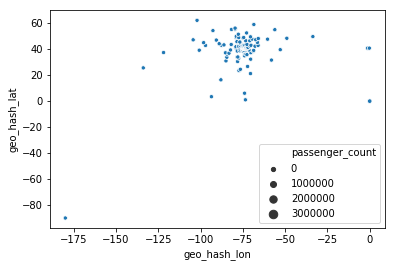

In [146]:
sns.scatterplot(x="geo_hash_lon", y="geo_hash_lat",
                     size="passenger_count",
                      data=tax_hash)

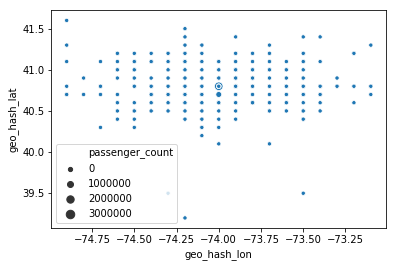

In [147]:
sns.scatterplot(x="geo_hash_lon", y="geo_hash_lat",
                     size="passenger_count",
                      data=tax_hash.query("geo_hash_lon> -75 & geo_hash_lon< -73 & geo_hash_lat> 39 & geo_hash_lat<41.8 "))

In [148]:
yellow_t = yellow[yellow["pickup_datetime"] > '2014-04-01']
yellow_t = yellow_t[yellow_t["pickup_datetime"] < '2014-09-01']
mta_has = mta.groupby(["pickup_geohash"]).agg({"new_entries":"sum"}).rename(columns = {"new_entries": "passenger_count"}).reset_index()

In [149]:

mta_has["type"] = "mta"
tax_hash["type"] = "tax"
mta_has["geo_hash_lat_lon"] = mta_has.pickup_geohash.apply(lambda x : pgh.decode(x)) 
mta_has["geo_hash_lat"] = mta_has.geo_hash_lat_lon.apply(lambda x : x[0])
mta_has["geo_hash_lon"] = mta_has.geo_hash_lat_lon.apply(lambda x : x[1])


In [160]:
total_trans = pd.concat([tax_hash, mta_has])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


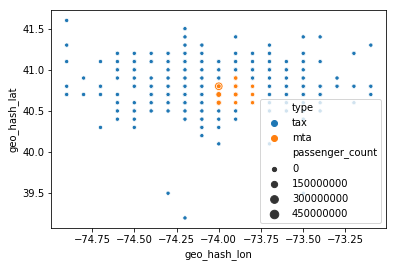

In [162]:
sns.scatterplot(x="geo_hash_lon", y="geo_hash_lat",
                     size="passenger_count", hue ="type" ,
                      data=total_trans.query("geo_hash_lon> -75 & geo_hash_lon< -73 & geo_hash_lat> 39 & geo_hash_lat<41.8 "))

In [ ]:
yellow.head()

In [ ]:
yellow_filte = yellow[yellow["trip_distance"]>1]

In [ ]:
hash_start = []
hash_end = []
for idx, row in yellow_filte.iterrows():
    hash_start.append(pgh.encode(row["pickup_latitude"], row["pickup_longitude"], precision=5) )
    hash_end.append(pgh.encode(row["dropoff_latitude"], row["dropoff_longitude"], precision=5) )

In [ ]:
yellow_filte["pickup_datetime"] = pd.to_datetime(yellow_filte["pickup_datetime"], format='%Y-%m-%d %H:%M:%S')
yellow_filte["dropoff_datetime"] = pd.to_datetime(yellow_filte["dropoff_datetime"], format='%Y-%m-%d %H:%M:%S')

In [ ]:
yellow_filte["hash_pick"] = hash_start
yellow_filte["hash_drop"] = hash_end

In [ ]:
yellow_filte["year"]= yellow.dropoff_datetime.apply(lambda x : x.year)

In [ ]:
hash_sum = yellow_filte.groupby(["year","hash_pick", "hash_drop" ]).agg({"trip_distance":"mean",
                                                                   "total_amount":"mean", 
                                                                  "passenger_count":"count"})

In [ ]:
hash_sum

In [ ]:
len(yellow.hash_drop.unique())

In [ ]:
green = pd.read_csv("Dataset/green_trips.csv")

In [ ]:
yellow.columns

In [ ]:
yellow.dtypes

In [ ]:
yellow["ones"] = 1
yellow.head()

In [ ]:
yellow["date"] = pd.to_datetime(yellow["pickup_datetime"], format='%Y-%m-%d %H:%M:%S')

In [ ]:
yellow["date1"] = pd.to_datetime(yellow["dropoff_datetime"], format='%Y-%m-%d %H:%M:%S')

In [ ]:
max(yellow["pickup_datetime"])

In [ ]:
min(yellow["pickup_datetime"])

In [ ]:
yellow.describe()

In [ ]:
#green.describe()

In [ ]:


#rcParams['figure.figsize'] = 18, 8
#decomposition = sm.tsa.seasonal_decompose(yel_2014, model='additive')
#fig = decomposition.plot()
#plt.show()

# Analysis from time series trips 

In [ ]:
#yellow["week"] = yellow["date"].apply(lambda x : x.month)
#yellow["day"] = yellow["date"].apply(lambda x : x.day)


In [ ]:
yellow["date_d"] = yellow["date"].apply(lambda x : x.date())

In [ ]:
group_day = yellow.groupby('date').agg({"ones":"count"}).reset_index()

In [ ]:
sns.lineplot(data = yellow, x= "date", y= "ones")

In [ ]:
yel_2014 = yellow[yellow["pickup_datetime"]<'2015-01-01']
yel_2014= yel_2014[["date", "ones"]]
yel_2014 = yel_2014.set_index("date")
yel_2014 = yel_2014['ones'].resample('d').sum()

In [ ]:
yel_2014.plot()

In [ ]:
yel_2014 = yellow[yellow["pickup_datetime"]<'2015-01-01']
yel_2014= yel_2014[["date", "ones"]]
yel_2014 = yel_2014.set_index("date")
yel_2014 = yel_2014['ones'].resample('W').sum()
yel_2014.plot()

In [ ]:
yel_2015 = yellow[yellow["pickup_datetime"]>'2015-01-01']
yel_2015= yel_2015[["date", "ones"]]
yel_2015 = yel_2015.set_index("date")
yel_2015 = yel_2015['ones'].resample('d').sum()
yel_2015.plot()

In [ ]:
yellow_subset = yellow[["date", "ones"]]
yellow_subset = yellow_subset.set_index("date")
yellow_subset = yellow_subset['ones'].resample('d').sum()
yellow_subset.plot()

In [ ]:
yellow_subset = yellow[["date", "ones"]]
yellow_subset = yellow_subset.set_index("date")
yellow_subset = yellow_subset['ones'].resample('W').sum()
yellow_subset.plot()
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(yellow_subset, model='additive')
fig = decomposition.plot()
plt.show()

# Time traveling info 

In [ ]:
#pd.Timedelta(pd.to_timedelta( yellow['date1']) - pd.to_timedelta(yellow['date']))